In [10]:
import numpy as np
import matplotlib.pyplot as plt

image_result = np.zeros((21,200))

Predicted class is: Great Dane


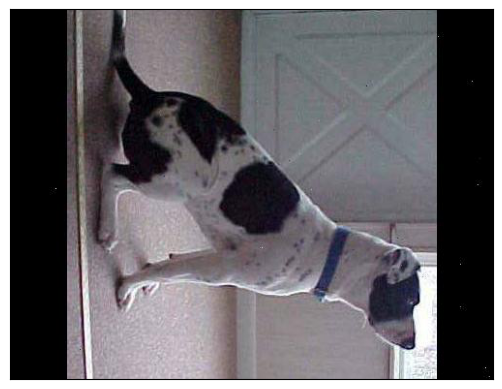

In [11]:
import json
from PIL import Image
from torchvision import models, transforms

# Choose an image to pass through the model
test_image = "ch4/Flag/0_0.jpg"

# Prepare the labels
with open("imagenet-simple-labels.json") as f:
    labels = json.load(f)

# First prepare the transformations: resize the image to what the model was trained on and convert it to a tensor
data_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]
)

# Load the image
image = Image.open(test_image)
plt.imshow(image), plt.xticks([]), plt.yticks([])

# Now apply the transformation, expand the batch dimension
image = data_transform(image).unsqueeze(0)

# Download the model if it's not there already. It will take a bit on the first run, after that it's fast
model = models.resnet50(pretrained=True)

# Set layers such as dropout and batchnorm in evaluation mode
model.eval()

# Get the 1000-dimensional model output
out = model(image)

# Find the predicted class
print("Predicted class is: {}".format(labels[out.argmax()]))

In [12]:
dogs = [
"Chihuahua",
"Japanese Chin",
"Maltese",
"Pekingese",
"Shih Tzu",
"King Charles Spaniel",
"Papillon",
"toy terrier",
"Rhodesian Ridgeback",
"Afghan Hound",
"Basset Hound",
"Beagle",
"Bloodhound",
"Bluetick Coonhound",
"Black and Tan Coonhound",
"Treeing Walker Coonhound",
"English foxhound",
"Redbone Coonhound",
"borzoi",
"Irish Wolfhound",
"Italian Greyhound",
"Whippet",
"Ibizan Hound",
"Norwegian Elkhound",
"Otterhound",
"Saluki",
"Scottish Deerhound",
"Weimaraner",
"Staffordshire Bull Terrier",
"American Staffordshire Terrier",
"Bedlington Terrier",
"Border Terrier",
"Kerry Blue Terrier",
"Irish Terrier",
"Norfolk Terrier",
"Norwich Terrier",
"Yorkshire Terrier",
"Wire Fox Terrier",
"Lakeland Terrier",
"Sealyham Terrier",
"Airedale Terrier",
"Cairn Terrier",
"Australian Terrier",
"Dandie Dinmont Terrier",
"Boston Terrier",
"Miniature Schnauzer",
"Giant Schnauzer",
"Standard Schnauzer",
"Scottish Terrier",
"Tibetan Terrier",
"Australian Silky Terrier",
"Soft-coated Wheaten Terrier",
"West Highland White Terrier",
"Lhasa Apso",
"Flat-Coated Retriever",
"Curly-coated Retriever",
"Golden Retriever",
"Labrador Retriever",
"Chesapeake Bay Retriever",
"German Shorthaired Pointer",
"Vizsla",
"English Setter",
"Irish Setter",
"Gordon Setter",
"Brittany",
"Clumber Spaniel",
"English Springer Spaniel",
"Welsh Springer Spaniel",
"Cocker Spaniels",
"Sussex Spaniel",
"Irish Water Spaniel",
"Kuvasz",
"Schipperke",
"Groenendael",
"Malinois",
"Briard",
"Australian Kelpie",
"Komondor",
"Old English Sheepdog",
"Shetland Sheepdog",
"collie",
"Border Collie",
"Bouvier des Flandres",
"Rottweiler",
"German Shepherd Dog",
"Dobermann",
"Miniature Pinscher",
"Greater Swiss Mountain Dog",
"Bernese Mountain Dog",
"Appenzeller Sennenhund",
"Entlebucher Sennenhund",
"Boxer",
"Bullmastiff",
"Tibetan Mastiff",
"French Bulldog",
"Great Dane",
"St. Bernard",
"husky",
"Alaskan Malamute",
"Siberian Husky",
"Dalmatian",
"Affenpinscher",
"Basenji",
"pug",
"Leonberger",
"Newfoundland",
"Pyrenean Mountain Dog",
"Samoyed",
"Pomeranian",
"Chow Chow",
"Keeshond",
"Griffon Bruxellois",
"Pembroke Welsh Corgi",
"Cardigan Welsh Corgi",
"Toy Poodle",
"Miniature Poodle",
"Standard Poodle",
"Mexican hairless dog",
]

cats = ["tabby cat",
"tiger cat",
"Persian cat",
"Siamese cat",
"Egyptian Mau"]

labels_cat_dog = {}
for dog in dogs:
    labels_cat_dog[dog] = "dog"
for cat in cats:
    labels_cat_dog[cat] = "cat"

labels_cat_dog;

In [13]:
import os

# Directory containing the images
directory = 'ch4/Flag'
failed_predict = 0

# Iterate over all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        file_path = os.path.join(directory, filename)
        image = Image.open(file_path)
        coordinates = filename.split(".")[0].split("_")
        image = data_transform(image).unsqueeze(0)
        out = model(image)
        predicted_class = labels[out.argmax()]
        
        try:
            res = labels_cat_dog[predicted_class]
            if res == "cat":
                image_result[int(coordinates[0]), int(coordinates[1])] = 1
        except:
            image_result[int(coordinates[0]), int(coordinates[1])] = 0.5
            failed_predict += 1

print("Failed prediction:",failed_predict)

Failed prediction: 922


(<matplotlib.image.AxesImage at 0x23eb0748ce0>, ([], []), ([], []))

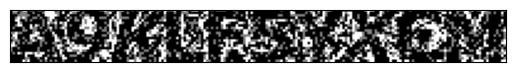

In [14]:
plt.imshow(image_result, cmap='gray'), plt.xticks([]), plt.yticks([])
